# Research

In [1]:
import pandas as pd
from datetime import datetime, timedelta, date
import time
import matplotlib.pyplot as plt

In [2]:
#####  Get the current Portofolio
# portfolio_csv = 'portofolio.csv'
# df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code').drop('LU0122613903')

transacoes_csv = 'transacoes.csv'
encoding='latin_1'
thousands = ','
decimal = '.'
to_date = lambda d: datetime.strptime(d, '%d-%m-%Y')
converters={'Data de subscrição': to_date}

transacoes_csv = 'transacoes.csv'
transacoes_etf_csv = 'transacoes_etf.csv'

df_portofolio = pd.concat([
    pd.read_csv(transacoes_csv ,sep=',',encoding=encoding,thousands=thousands, decimal=decimal, converters=converters),
    pd.read_csv(transacoes_etf_csv ,sep=',',encoding=encoding,thousands=thousands, decimal=decimal, converters=converters)])
df_portofolio = df_portofolio[pd.isnull(df_portofolio['Data de resgate'])].groupby(['Code','Nome','Moeda'])['Quantidade'].sum().reset_index().set_index('Code')
df_portofolio.sort_values(by='Nome')

,Nome,Moeda,Quantidade
Code,,,
LU1146622755,Aberdeen China A Sustainable,USD,1183.737
LU1883841022,Amundi Pioneer Strategic Income,EUR,1291.989
IE00B6VXJV34,BNY Mellon Absolute Return Bond,EUR,315.475
QTUM,Defiance Quantum,USD,210.000
LU0055114457,Fidelity Indonesia A-Dist,USD,508.610
LU0048621477,Fidelity Thailand A-DIST-USD,USD,310.860
IE00B59GC072,GAM Star Global Accum Hedged,EUR,1022.810
IE00BNQ4LN68,GAM Star MBS Total Return USD,USD,1962.320
LU0607518205,Invesco Emerg Market Bond Hedged,EUR,2083.906


In [3]:

#Get the Exchange Rates
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
exchange_rates = exchange_rates.set_index('Date')['USD2EUR']
exchange_rates.head()

Date
2024-09-26    0.89473
2024-09-25    0.89836
2024-09-24    0.89389
2024-09-23    0.89990
2024-09-22    0.89580
Name: USD2EUR, dtype: float64

In [4]:

df_quotes = pd.read_csv("ft_quotes.csv",index_col=0,parse_dates=True).sort_index(ascending=True).ffill().dropna(axis=1)
df_quotes.index = [x.date() for x in df_quotes.index]
df_perform = pd.read_csv("ft_funds_perform.csv", index_col=0)
df_cat_perform = pd.read_csv("ft_cat_perform.csv", index_col=0)
df_trading_signal = pd.read_csv("ft_trading_signals.csv", index_col=0)
df_trading_signal.index.name = 'Code'

max_date = df_quotes.index.max()
w1_ago = max_date-timedelta(days=7)
w1_ago = df_quotes[df_quotes.index <= w1_ago].index.max()
d1_ago = max_date-timedelta(days=1)
d1_ago = df_quotes[df_quotes.index <=d1_ago].index.max()
w2_ago = max_date-timedelta(days=14)
w2_ago = df_quotes[df_quotes.index <= w2_ago].index.max()

df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[d1_ago]-1).rename('1 day'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w1_ago]-1).rename('1 week'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w2_ago]-1).rename('2 week'))

df_perform = df_perform[df_perform['currency'].isin(['EUR','USD'])]

df_perform = df_perform[~df_perform.index.str.startswith("PT")]

df_perform

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
DE000A0D95Q0,0.0149,0.0028,0.0583,0.0055,0.0107,-0.0038,EUR Cautious Allocation - Global,ODDO BHF Polaris Moderate DRW-EUR,EUR,5,4,0.000000,-0.000398,0.003059
DE000A0X7541,0.0576,0.0276,0.0529,0.0115,-0.0037,-0.0084,EUR Flexible Allocation - Global,Acatis Value Event Fonds A,EUR,5,5,0.008205,0.004218,0.017088
DE000A1T73W9,0.0552,0.0240,0.0528,0.0114,-0.0038,-0.0084,EUR Flexible Allocation - Global,Acatis Value Event Fonds C,EUR,5,5,0.008226,0.004218,0.017096
DE000A2DR2L2,0.0900,0.0207,0.0546,-0.0030,-0.0139,-0.0269,Global Small/Mid-Cap Equity,ACATIS AI Global Equities A,EUR,5,6,0.014171,0.006878,0.030592
DE000A2JJ1W5,0.0144,0.0034,0.0593,0.0061,0.0110,-0.0036,EUR Cautious Allocation - Global,ODDO BHF Polaris Moderate CR EUR,EUR,5,4,0.000000,-0.000250,0.003100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU2459593625,NaN,NaN,0.2494,0.0496,0.0509,0.0048,Other Equity,Morgan Stanley Investment Funds - Calvert Sust...,EUR,0,6,0.007863,0.008898,0.039492
LU2459594276,NaN,NaN,0.1690,0.0189,-0.0028,0.0023,Global Large-Cap Blend Equity,Morgan Stanley Investment Funds - Calvert Sust...,USD,0,6,0.006707,0.009933,0.034460
LU2459594789,NaN,NaN,0.2103,0.0411,0.0373,-0.0001,Other Equity,Morgan Stanley Investment Funds - Calvert Sust...,EUR,0,6,0.006819,0.009918,0.033964
LU2459595166,NaN,NaN,0.1899,0.0177,0.0013,0.0089,Global Large-Cap Blend Equity,Morgan Stanley Investment Funds - Calvert Sust...,USD,0,6,0.008455,0.011746,0.043054


In [5]:

df_quotes = df_quotes[list(set(df_perform.index) & set(df_quotes.columns))]

for code in df_quotes.columns:
    if df_perform['currency'][code] == 'USD':
        df_quotes[code] = df_quotes[code] * exchange_rates
df_quotes = df_quotes.ffill()
df_quotes

,LU1542252181,LU0081259029,LU0665628672,LU1219733679,LU0727123159,LU0080735201,LU0130731713,LU0085953304,LU0164939612,LU0117885052,...,LU0145652649,LU0356218148,IE00BLWF5Q02,LU0133082254,LU0563745743,LU1278928657,LU0255975913,LU1805264048,LU1373035150,IE00BLDYK493
2022-11-14,83.89,485.766388,50.90,10.87,23.82,9.051487,223.29,366.197596,65.695967,6.841917,...,150.35,51.58,7.743189,29.267122,14.54,137.58,134.60,9.72,92.73,16.067844
2022-11-15,84.08,496.662285,51.18,10.81,23.92,9.074102,224.67,365.522204,65.999612,7.066216,...,150.86,51.90,7.703333,29.336379,14.62,137.07,135.87,9.87,92.12,16.256157
2022-11-16,84.33,479.365636,51.30,10.72,23.68,9.033743,222.00,363.629818,65.525907,6.869108,...,151.89,52.12,7.677239,29.227383,14.47,136.24,134.15,9.85,92.73,15.999058
2022-11-17,85.02,477.546813,51.33,10.62,23.62,8.966429,221.14,362.025615,65.197233,6.678976,...,151.56,52.06,7.702057,29.234999,14.36,136.06,133.52,9.80,93.72,15.867395
2022-11-18,84.61,478.168488,51.19,10.78,23.78,8.990310,223.65,367.742347,64.894571,6.766900,...,152.03,52.07,7.714266,29.300677,14.48,136.75,134.34,9.82,93.87,15.960217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20,90.74,684.449117,52.69,11.90,25.40,8.939152,277.26,416.149287,83.807905,10.701928,...,156.76,53.25,7.587989,32.499499,19.69,136.73,158.64,10.60,108.53,17.833563
2024-09-23,90.82,690.385282,52.68,11.96,25.53,8.972003,278.44,416.977664,84.284634,10.852794,...,157.00,53.26,7.631152,32.666370,19.67,137.09,158.64,10.60,109.05,18.006999
2024-09-24,90.68,691.003787,52.68,11.98,25.50,8.921022,279.61,414.693449,83.811126,10.798191,...,157.14,53.31,7.580187,32.430329,19.71,137.00,158.79,10.73,108.54,17.895678
2024-09-25,90.91,694.558050,52.81,11.94,25.57,9.001567,279.35,414.853664,84.221250,10.959992,...,156.96,53.32,7.618093,32.583517,19.68,136.18,159.40,10.73,108.32,17.805495


### Short term

In [6]:
df_perform.sort_values(by="1 week", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0594300096,-0.0660,-0.1269,-0.0849,0.0583,0.0147,0.1646,China Equity,Fidelity Funds - China Consumer Fund A-Acc-EUR,EUR,3,6,0.082039,0.161441,0.190834
LU0117867159,-0.0368,-0.1599,-0.0727,0.0770,0.0155,0.1534,China Equity,JPMorgan Funds - China Fund D (acc) - USD,USD,3,7,0.071375,0.154032,0.196488
LU0173614495,-0.0023,0.0069,-0.0107,0.0830,0.0303,0.1477,China Equity,Fidelity Funds - China Focus Fund A-DIST-USD,USD,4,6,0.069210,0.153314,0.213875
LU0244354824,-0.0264,-0.1108,-0.0557,0.0911,0.0629,0.1534,China Equity,Schroder International Selection Fund China Op...,USD,4,6,0.072999,0.152874,0.198041
LU0522352607,-0.0360,-0.1593,-0.0694,0.0807,0.0173,0.1545,China Equity,JPMorgan Funds - China Fund D (acc) - EUR,EUR,3,7,0.076472,0.152358,0.185212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU1683285321,-0.0064,-0.2036,0.0862,-0.0438,0.0455,-0.0241,Other Equity,CS Investment Funds 2 - Credit Suisse (Lux) Di...,EUR,0,7,0.000000,-0.043509,-0.011604
LU0112497440,0.0514,-0.0181,0.1396,-0.0227,-0.0320,-0.0664,Sector Equity Biotechnology,Pictet-Biotech R USD,USD,2,7,-0.006738,-0.044438,-0.019603
LU0190162189,0.0324,-0.0583,0.1760,-0.0025,0.0071,-0.0687,Other Equity,Pictet-Biotech HR EUR,EUR,0,7,-0.006847,-0.044747,-0.020420
LU0255977539,0.0523,-0.0173,0.1436,-0.0193,-0.0303,-0.0656,Sector Equity Biotechnology,Pictet-Biotech R EUR,EUR,2,7,-0.001825,-0.045794,-0.028751


In [7]:

df_perform[df_perform['rating']>=3].sort_values(by="1 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0594300096,-0.0660,-0.1269,-0.0849,0.0583,0.0147,0.1646,China Equity,Fidelity Funds - China Consumer Fund A-Acc-EUR,EUR,3,6,0.082039,0.161441,0.190834
LU0117867159,-0.0368,-0.1599,-0.0727,0.0770,0.0155,0.1534,China Equity,JPMorgan Funds - China Fund D (acc) - USD,USD,3,7,0.071375,0.154032,0.196488
LU0173614495,-0.0023,0.0069,-0.0107,0.0830,0.0303,0.1477,China Equity,Fidelity Funds - China Focus Fund A-DIST-USD,USD,4,6,0.069210,0.153314,0.213875
LU0244354824,-0.0264,-0.1108,-0.0557,0.0911,0.0629,0.1534,China Equity,Schroder International Selection Fund China Op...,USD,4,6,0.072999,0.152874,0.198041
LU0522352607,-0.0360,-0.1593,-0.0694,0.0807,0.0173,0.1545,China Equity,JPMorgan Funds - China Fund D (acc) - EUR,EUR,3,7,0.076472,0.152358,0.185212
LU0823426720,-0.0528,-0.1598,-0.1158,0.0363,-0.0040,0.0484,China Equity,BNP Paribas Funds China Equity N Capitalisation,USD,3,6,0.066700,0.147182,0.183164
LU1882445643,-0.0662,-0.1587,-0.1398,-0.0067,-0.0486,0.0525,China Equity,Amundi Funds - China Equity A USD (C),USD,3,6,0.070204,0.140992,0.190736
LU0404923640,-0.0429,-0.1368,-0.0163,0.0976,0.0550,0.1272,China Equity,Goldman Sachs All China Equity Portfolio Base ...,USD,3,6,0.059117,0.136850,0.173639
LU0982190216,-0.0117,-0.0993,0.0107,0.0765,0.0367,0.1256,China Equity,GAM Multistock - China Evolution Equity USD E,USD,3,6,0.048942,0.132349,0.173108
LU0231483743,-0.0683,-0.1456,-0.0778,0.0496,0.0191,0.1020,China Equity,Aberdeen Standard SICAV I - All China Sustaina...,USD,3,6,0.051306,0.126782,0.159246


In [8]:
df_perform[(df_perform['risk']<=3) & (df_perform['currency']=="EUR")].sort_values(by="2 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0546913194,0.0008,0.0082,0.0355,-0.0289,-0.0141,-0.0134,Capital Protected,NN (L) First Class Protection - P Cap EUR,EUR,0,3,0.007297,0.006379,0.014701
LU0577845802,-0.0228,-0.0156,0.0001,-0.0056,0.0155,-0.0034,Other Bond,NN (L) Emerging Markets Debt (Local Currency) ...,EUR,0,3,0.001605,0.003949,0.014285
LU1445733824,-0.0089,-0.0060,0.0521,0.0054,0.0121,-0.0022,EUR Moderate Allocation - Global,Morgan Stanley Investment Funds - Global Balan...,EUR,2,3,0.004176,0.005321,0.012246
LU1548496022,0.0005,-0.0056,0.0734,0.0118,0.0168,-0.0017,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,0.002168,0.007058,0.011111
LU1927799954,0.0068,0.0073,0.1017,0.0303,0.0311,0.0019,EUR High Yield Bond,Nordea 1 - European High Yield Stars Bond Fund...,EUR,1,3,0.000743,0.005393,0.011097
LU1089088071,0.0005,-0.0056,0.0735,0.0118,0.0168,-0.0018,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,0.002160,0.007031,0.011069
IE00B5B2BY02,-0.0346,-0.0563,-0.0468,-0.0077,0.0203,-0.0059,Macro Trading EUR,GAM Star Fund plc - GAM Star Emerging Market R...,EUR,2,3,0.000000,0.001072,0.010823
LU0393653240,-0.0433,-0.0383,0.0358,0.0059,0.0075,-0.0065,EUR Cautious Allocation - Global,Fidelity Funds - Global Multi Asset Defensive ...,EUR,1,3,0.003451,0.006055,0.010426
LU0413543991,-0.0395,-0.0350,0.0372,0.0074,0.0094,-0.0033,EUR Cautious Allocation - Global,Fidelity Funds - Global Multi Asset Defensive ...,EUR,2,3,0.003724,0.006536,0.010309
LU0459959929,-0.0014,-0.0215,0.0358,0.0031,0.0177,0.0008,"Convertible Bond - Global, EUR Hedged",Candriam Bonds Convertible Defensive Class C E...,EUR,3,3,0.000000,0.004423,0.010178


### Category 

In [9]:
#df_cat_perform.drop(columns=["3 years","6 months"],inplace=True)
df_perform_group_by = df_perform.groupby(by="ft category")
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].mean().rename('1 day mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].median().rename('1 m mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].median().rename('1 day median'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].max().rename('1 m max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].count().rename('count'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].median().rename('1 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].max().rename('1 w max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].median().rename('2 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].max().rename('2 w max'))

In [10]:
df_cat_perform['1 w mean'].sort_values(ascending=False)[:20]

ft category
China Equity                           0.130699
Greater China Equity                   0.115732
China Equity - A Shares                0.102668
Hong Kong Equity                       0.098177
Asia ex-Japan Equity                   0.068642
Convertible Bond - Other               0.050012
Asia-Pacific ex-Japan Equity           0.049689
Global Emerging Markets Equity         0.048087
Asia-Pacific Equity                    0.047793
Asia-Pacific ex-Japan Equity Income    0.047546
Sector Equity Precious Metals          0.047230
Taiwan Large-Cap Equity                0.044793
Korea Equity                           0.040573
Africa Equity                          0.034602
Other Allocation                       0.030984
Japan Large-Cap Equity                 0.028582
Asia Allocation                        0.028192
Greater China Allocation               0.026916
Japan Small/Mid-Cap Equity             0.026788
Japan Flex-Cap Equity                  0.025958
Name: 1 w mean, dtype: float

In [11]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="1 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
China Equity,-0.0448,-0.1292,-0.0920,0.0151,-0.0330,0.0492,0.054931,0.07915,0.059154,0.1646,32.0,0.130699,0.161441,0.166995,0.213875
Greater China Equity,-0.0091,-0.0914,-0.0068,0.0210,-0.0397,0.0385,0.055486,0.09100,0.055066,0.1127,9.0,0.115732,0.147629,0.148395,0.199817
China Equity - A Shares,-0.0268,-0.1417,-0.1494,-0.0617,-0.0389,0.0277,0.039614,0.05900,0.039621,0.0968,5.0,0.102668,0.109589,0.117849,0.125680
Hong Kong Equity,-0.0240,-0.0590,-0.0306,0.0798,0.0022,0.0638,0.042168,0.09425,0.042168,0.1101,2.0,0.098177,0.111053,0.139863,0.154497
Asia ex-Japan Equity,0.0295,-0.0346,0.0842,0.0487,-0.0170,0.0221,0.031043,0.04290,0.029817,0.0853,49.0,0.068642,0.103427,0.087523,0.143816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JPY Bond,-0.0934,-0.1068,-0.0755,-0.0230,0.0654,-0.0022,-0.004567,-0.00350,-0.004567,-0.0035,1.0,-0.015309,-0.015309,-0.025943,-0.025943
Norway Equity,0.0576,0.0050,0.0925,0.0421,-0.0386,-0.0186,-0.007256,-0.01720,-0.007256,-0.0172,1.0,-0.015759,-0.015759,0.026438,0.026438
Sector Equity Healthcare,0.0624,-0.0218,0.0466,-0.0140,-0.0168,-0.0263,0.002683,-0.03175,0.002943,-0.0049,26.0,-0.021060,0.001884,-0.012614,0.017555


In [12]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="1 day median",ascending=False).head(20)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
China Equity,-0.0448,-0.1292,-0.0920,0.0151,-0.0330,0.0492,0.054931,0.07915,0.059154,0.1646,32.0,0.130699,0.161441,0.166995,0.213875
Greater China Equity,-0.0091,-0.0914,-0.0068,0.0210,-0.0397,0.0385,0.055486,0.09100,0.055066,0.1127,9.0,0.115732,0.147629,0.148395,0.199817
Hong Kong Equity,-0.0240,-0.0590,-0.0306,0.0798,0.0022,0.0638,0.042168,0.09425,0.042168,0.1101,2.0,0.098177,0.111053,0.139863,0.154497
China Equity - A Shares,-0.0268,-0.1417,-0.1494,-0.0617,-0.0389,0.0277,0.039614,0.05900,0.039621,0.0968,5.0,0.102668,0.109589,0.117849,0.125680
Korea Equity,0.0361,-0.0694,-0.0091,-0.0912,-0.1333,-0.0743,0.033175,-0.02720,0.033175,-0.0272,1.0,0.040573,0.040573,0.054839,0.054839
Asia ex-Japan Equity,0.0295,-0.0346,0.0842,0.0487,-0.0170,0.0221,0.031043,0.04290,0.029817,0.0853,49.0,0.068642,0.103427,0.087523,0.143816
Japan Large-Cap Equity,0.0463,0.0045,0.0758,-0.0343,0.0062,-0.0177,0.029458,0.00260,0.028741,0.0252,31.0,0.028582,0.038089,0.034639,0.059688
Asia-Pacific Equity,0.0364,-0.0125,0.0867,0.0115,0.0014,0.0031,0.027788,0.02530,0.026814,0.0648,5.0,0.047793,0.063344,0.061345,0.094309
Japan Small/Mid-Cap Equity,0.0091,-0.0594,0.0093,-0.0318,0.0273,0.0034,0.026310,0.02340,0.026678,0.0431,4.0,0.026788,0.032427,0.036103,0.055972


In [13]:
trendy_cat = df_cat_perform.apply(lambda x: x['1 w mean'] + x['1 m mean']*(1 if (x['1 w mean']<0 and x['1 m mean']<0) else -1)  ,axis=1).sort_values(ascending=False)[:10]
trendy_cat = df_cat_perform[df_cat_perform.apply(lambda x: (x['1 w mean'] > 0) and (x['1 m mean'] <0)  ,axis=1)][:20].sort_values(by=['2 w mean'],ascending=False)
trendy_cat

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
"Convertible Bond - Global, EUR Hedged",0.0048,-0.0496,0.0441,0.0020,0.0203,0.0041,0.002552,-0.00020,0.001408,0.0099,14.0,0.007988,0.016586,0.023230,0.029405
Asia High Yield Bond,-0.0573,-0.0595,0.0729,0.0035,-0.0258,-0.0051,0.005792,-0.00510,0.005508,-0.0019,10.0,0.011078,0.013415,0.022226,0.023710
Capital Protected,-0.0028,0.0086,-0.0154,0.0116,-0.0017,0.0142,0.007297,-0.01340,0.007297,-0.0134,1.0,0.006379,0.006379,0.014701,0.014701
EUR Flexible Allocation - Global,0.0231,0.0048,0.0812,0.0039,0.0001,-0.0015,0.003209,-0.00310,0.003064,0.0083,43.0,0.006083,0.019587,0.014637,0.052809
EUR Flexible Allocation,0.0193,-0.0006,0.0702,0.0001,-0.0028,-0.0034,0.005876,-0.01560,0.005876,-0.0145,2.0,0.001023,0.006808,0.012366,0.019043
Convertible Bond - Europe,-0.0057,-0.0312,0.0216,-0.0105,-0.0008,-0.0030,0.002192,-0.00570,0.001926,-0.0015,6.0,0.001909,0.003561,0.009952,0.013398
EUR High Yield Bond,0.0086,0.0023,0.0675,0.0139,0.0172,-0.0038,0.000082,-0.00460,0.000609,0.0019,49.0,0.002229,0.007606,0.007585,0.011267
EUR Cautious Allocation - Global,0.0015,-0.0080,0.0618,0.0070,0.0116,-0.0039,0.001652,-0.00525,0.001572,0.0075,36.0,0.002069,0.012752,0.006435,0.027687
EUR Cautious Allocation,-0.0022,-0.0120,0.0535,0.0016,0.0071,-0.0050,0.001744,-0.00555,0.001659,-0.0045,6.0,0.001975,0.003611,0.006241,0.007583


In [14]:
_2d_ago = max_date-timedelta(days=3)
_2d_ago = df_quotes[df_quotes.index <= _2d_ago].index.max()
df_quotes.loc[max_date]/df_quotes.loc[_2d_ago]-1

LU1542252181    0.000000
LU0081259029    0.025086
LU0665628672    0.005505
LU1219733679    0.004181
LU0727123159    0.004309
                  ...   
LU1278928657   -0.002334
LU0255975913    0.029060
LU1805264048    0.037736
LU1373035150   -0.008895
IE00BLDYK493   -0.008229
Length: 3038, dtype: float64

In [15]:
ignore_list = {'LU1038809395','LU1799936510','LU0496443531','LU0439729285','LU0272942433','LU0442406459','IE00BNQ4LN68'}
relevant_funds = set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
relevant_funds &= set([idx for idx in df_perform.index if not idx.startswith("PT")])
relevant_funds &= set(df_quotes.columns)
relevant_funds -= set(ignore_list)
len(relevant_funds)

3032

In [16]:

trendy_funds = set(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
#trendy_funds &= set(df_perform[df_perform['rating'] >= 3].index)
cats_to_ignore = []#['Sector Equity Precious Metals','Sector Equity Natural Resources']
#cats_to_ignore += ['Asia-Pacific ex-Japan Equity','Sector Equity Ecology','US Large-Cap Growth Equity']
trendy_funds |= set(df_perform[df_perform.groupby('ft category')['2 week'].transform('max')==df_perform['2 week']].index)
trendy_funds |= set(df_perform[df_perform['rating'] >= 4].index)
trendy_funds &= set(df_perform[~df_perform['ft category'].isin(cats_to_ignore)].index)
trendy_funds &= set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
print(len(trendy_funds))
df_perform[df_perform.index.isin(trendy_funds)].groupby('ft category')['1 week'].count().sort_values(ascending=False)[:20]

832


ft category
Global Large-Cap Blend Equity                35
USD Moderate Allocation                      31
Europe Large-Cap Blend Equity                29
Global Emerging Markets Equity               24
Global Large-Cap Growth Equity               24
Japan Large-Cap Equity                       23
Global Emerging Markets Bond                 22
Other Equity                                 18
Sector Equity Technology                     17
Global Emerging Markets Bond - EUR Biased    15
EUR Moderate Allocation - Global             14
Global Flexible Bond - EUR Hedged            14
Global Flex-Cap Equity                       14
Global Bond                                  11
Asia ex-Japan Equity                         11
Global High Yield Bond - EUR Hedged          11
Global Equity Income                         10
EUR Cautious Allocation - Global             10
Equity Market Neutral EUR                    10
Sector Equity Natural Resources               9
Name: 1 week, dtype: int64

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0273148055,0.0643,0.1020,0.3667,0.3209,0.1816,0.0538,Sector Equity Precious Metals,DWS Invest Gold and Precious Metals Equities NC,EUR,4,7,0.001445,0.037239,0.072749
LU0345780281,0.0573,0.1173,0.2912,0.2847,0.1672,0.0441,Sector Equity Precious Metals,Ninety One Global Strategy Fund - Global Gold ...,USD,4,7,0.011890,0.050213,0.074445
LU0345780521,0.0572,0.1172,0.2914,0.2849,0.1671,0.0439,Sector Equity Precious Metals,Ninety One Global Strategy Fund - Global Gold ...,USD,4,7,0.012070,0.050095,0.074728


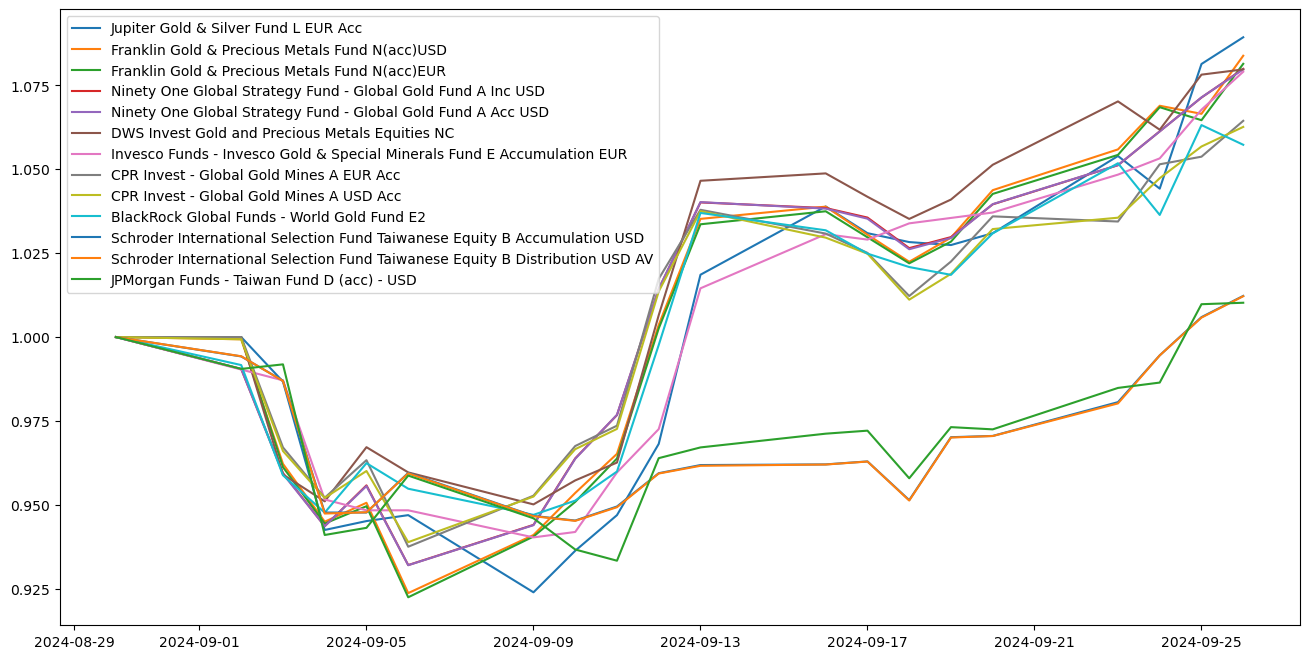

In [17]:
cats = ['Sector Equity Precious Metals','Taiwan Large-Cap Equity']
filter = df_perform['ft category'].isin(cats) & df_perform.index.isin(df_quotes.columns) # & df_perform.index.isin(trendy_funds)
#filter &= df_perform.index.isin(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
df = df_quotes[df_perform[filter].index][-20:]
ax = df.apply(lambda x: x/df.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df.index.max(), axis='columns', ascending=False).plot(figsize=(16,8))
ax.legend(loc='upper left')
ax.plot()
df_perform[filter & (df_perform['rating'] >= 4)]

[]

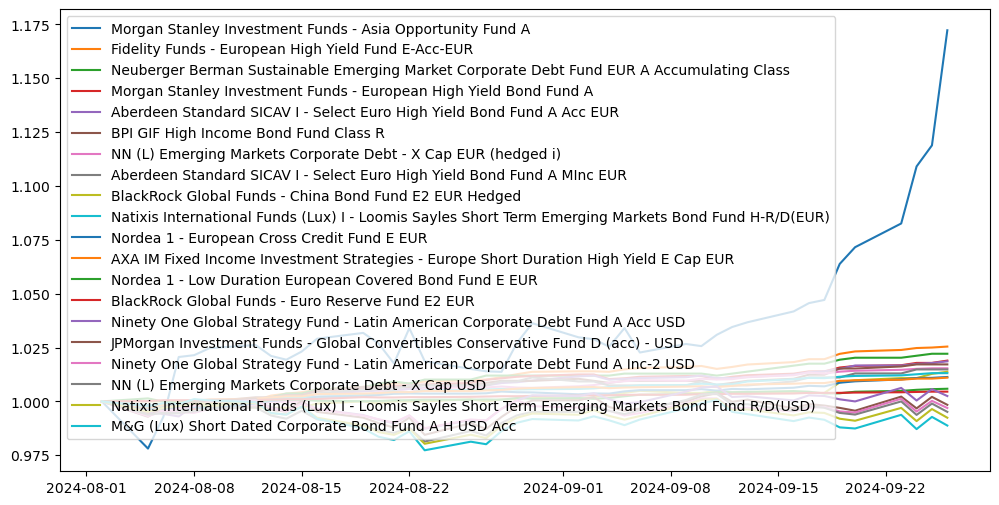

In [18]:
df_plot = df_quotes[df_trading_signal.loc[df_quotes.columns].sort_values(by='Extreme Signal').index[:20]][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()


In [19]:
df_perform.loc['IE00B59GC072']['name']

'GAM Star Fund plc - GAM Star Global Rates Class A EUR Accumulation Hedged'

In [20]:
# Get the historical quotes for ETfs

df_etf_list = pd.read_csv('etf_list.csv',index_col=0)
df_etf_list = df_etf_list[df_etf_list['Currency'].isin(['EUR','USD'])]
df_etf_list['Category'] = 'ETF'

etf_fname = "etf_quotes.csv"
df_etf_quotes = pd.read_csv(etf_fname, index_col=0).sort_index(ascending=True)[list(df_etf_list.index)]
df_etf_quotes.index = pd.to_datetime(df_etf_quotes.index).date

etf_ignore_list = ['FAGB.L','PHPD.AS']
df_etf_list = df_etf_list[df_etf_list.index.isin(df_etf_quotes.columns) & ~df_etf_list.index.isin(etf_ignore_list)]
df_etf_list['Category'] = 'ETF'


for col in df_etf_list.index:
    if df_etf_list['Currency'][col] == 'USD':
        df_etf_quotes[col] = df_etf_quotes[col]* exchange_rates
df_etf_quotes = df_etf_quotes.ffill()

df_quotes = pd.concat([df_quotes[df_etf_quotes.index.min():],df_etf_quotes],axis=1)

In [21]:
df_etf_list

,Name,Currency,Category
Symbol,,,
SIVR,abrdn Physical Silver Shares ET,USD,ETF
AMLP,Alerian MLP ETF,USD,ETF
DIVO,Amplify CWP Enhanced Dividend I,USD,ETF
IBUY,Amplify ETF Trust Amplify Onlin,USD,ETF
BLOK,Amplify Transformational Data S,USD,ETF
...,...,...,...
DXSN.DE,XTR.SHORTDAX DAILY SW. 1C,EUR,ETF
XSX6.DE,XTR.STOXX EUROPE 600 1C,EUR,ETF
XSMI.DE,XTR.SWITZERLAND 1D,EUR,ETF


In [22]:
df_fund_list = df_perform[['ft category',	'name',	'currency']].rename(columns={'ft category':'Category',	'name':'Name',	'currency':'Currency'})
df_fund_list = pd.concat([df_fund_list,df_etf_list])
df_fund_list

,Category,Name,Currency
DE000A0D95Q0,EUR Cautious Allocation - Global,ODDO BHF Polaris Moderate DRW-EUR,EUR
DE000A0X7541,EUR Flexible Allocation - Global,Acatis Value Event Fonds A,EUR
DE000A1T73W9,EUR Flexible Allocation - Global,Acatis Value Event Fonds C,EUR
DE000A2DR2L2,Global Small/Mid-Cap Equity,ACATIS AI Global Equities A,EUR
DE000A2JJ1W5,EUR Cautious Allocation - Global,ODDO BHF Polaris Moderate CR EUR,EUR
...,...,...,...
DXSN.DE,ETF,XTR.SHORTDAX DAILY SW. 1C,EUR
XSX6.DE,ETF,XTR.STOXX EUROPE 600 1C,EUR
XSMI.DE,ETF,XTR.SWITZERLAND 1D,EUR
XDGU.DE,ETF,X(IE)-USD CORP.BD 1DDL,EUR


In [23]:
from pypfopt.expected_returns import mean_historical_return, ema_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import cvxpy
import numpy as np
cvxpy.installed_solvers()

first_run = True

### Parameters

In [24]:
risk_free_rate = 0.028
last_n = 58
span = 5
cov_n = 153

amount_to_buy = 40000
amount_to_sell = 40000

shift_days = 0

### Portofolio Studies

In [25]:


#Remove funds that were sold
ignore_funds = set()
#sold_funds = {'LU0115098948','LU0055114457','LU0300742037'}

#####  Get the current Portofolio
# portfolio_csv = 'portofolio.csv'
# df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code').drop('LU0122613903')

#Select only funds that are in the portfolio and have quotes
df_portofolio = df_portofolio[df_portofolio.index.isin((set(df_portofolio.index) & set(df_quotes.columns)) - ignore_funds)]

#Add the last price to the portolio 
df_portofolio['Last Price'] = df_quotes.ffill()[df_portofolio.index].iloc[-1]

#get the last USD change rate
usd2eur = exchange_rates.iloc[0]

#Add the amount in EUR to the portolio
df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * df_portofolio['Last Price'] * df_portofolio['Quantidade']

df_portofolio_x = df_portofolio.join(df_trading_signal)
df_portofolio_x['Total Signal'] = df_portofolio_x['Trading Signal'] + df_portofolio_x['Extreme Signal']
df_portofolio_x.sort_values('Total Signal')

current_portfolio_amount = df_portofolio['Amount EUR'].sum()

final_portfolio_amount = current_portfolio_amount + amount_to_buy - amount_to_sell
current_portfolio_amount,final_portfolio_amount

(320867.15716858447, 320867.15716858447)

In [26]:
df_portofolio.sort_values(by='Nome')

,Nome,Moeda,Quantidade,Last Price,Amount EUR
Code,,,,,
LU1146622755,Aberdeen China A Sustainable,USD,1183.737,11.488333,12167.580969
LU1883841022,Amundi Pioneer Strategic Income,EUR,1291.989,11.470000,14819.113830
IE00B6VXJV34,BNY Mellon Absolute Return Bond,EUR,315.475,110.920000,34992.487000
QTUM,Defiance Quantum,USD,210.000,56.761670,10665.137484
LU0055114457,Fidelity Indonesia A-Dist,USD,508.610,24.873494,11319.146721
LU0048621477,Fidelity Thailand A-DIST-USD,USD,310.860,39.573908,11006.919259
IE00B59GC072,GAM Star Global Accum Hedged,EUR,1022.810,14.700000,15035.307000
IE00BNQ4LN68,GAM Star MBS Total Return USD,USD,1962.320,11.479386,20154.892461
LU0607518205,Invesco Emerg Market Bond Hedged,EUR,2083.906,12.090000,25194.423540


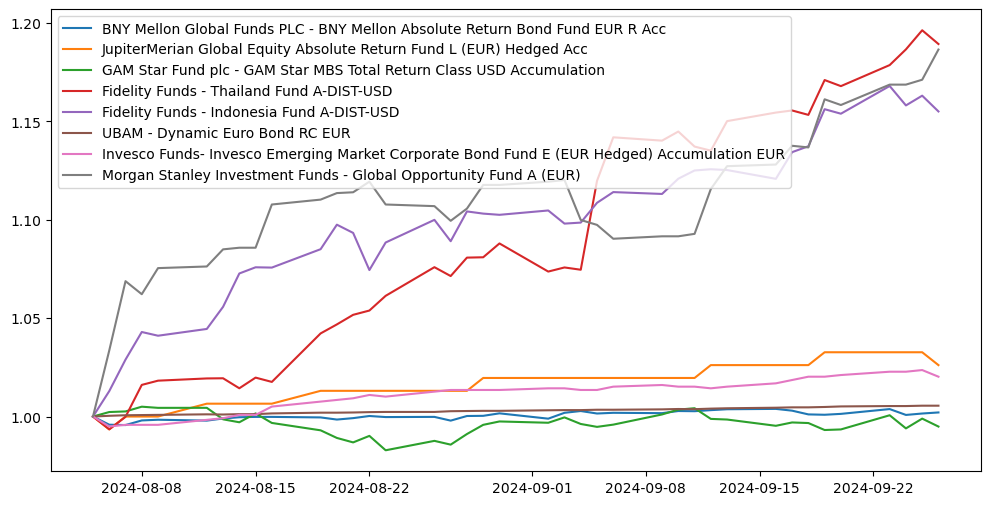

In [27]:
if len(df_portofolio_x[df_portofolio_x['Total Signal']<0].index):
    df_plot = df_quotes[df_portofolio_x[df_portofolio_x['Total Signal']<0].index][-40:]
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.plot()

### Portfolio Optimization Functions

In [28]:
def valid_date(d: date) -> date:
    if d in df_quotes.index:
        return d
    return max(dd for dd in df_quotes.index if dd <= d)

def my_ef(df_portofolio: pd.Series, current_date: date, last_n: int=last_n, span:int=span, cov_n_days : int= cov_n):
    mu = ema_historical_return(df_quotes[df_portofolio].loc[valid_date(current_date - timedelta(days=last_n)):current_date],span=span)
    S = CovarianceShrinkage(df_quotes[df_portofolio].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
    return mu, S

def my_old_ef(df_portofolio: pd.Series, current_date: date, last_n: int=last_n, cov_n_days : int= cov_n):
    mu = mean_historical_return(df_quotes[df_portofolio].loc[valid_date(current_date - timedelta(days=last_n)):current_date])
    S = CovarianceShrinkage(df_quotes[df_portofolio].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
    return mu, S

def new_fund_performance(new_portfolio, new_fund, amount=5000.0, risk_free_rate=risk_free_rate, last_n=last_n, goal='max_sharpe',target=None,weight_bounds = (0,1)):
    if new_fund in new_portfolio.index:
        new_portfolio.loc[new_fund,'Amount EUR'] += amount
    else:
        new_portfolio.loc[new_fund] = ["", df_fund_list.loc[new_fund]['Currency'],1,amount,amount]

    #mu = mean_historical_return(df_quotes[new_portfolio.index][-last_n:])
    #S = CovarianceShrinkage(df_quotes[new_portfolio.index][-cov_n:]).ledoit_wolf()
    current_date = df_quotes.index.max() - timedelta(days=shift_days)
    mu, S = my_ef(df_portofolio=new_portfolio.index,current_date=current_date)
    ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
    if goal=='max_sharpe':
        ef.max_sharpe(risk_free_rate=risk_free_rate)
    elif goal=='min_volatility':
        ef.min_volatility()
    elif goal=='efficient_risk':
        ef.efficient_risk(target_volatility=target)
    elif goal=='efficient_return':
        ef.efficient_return(target_return=target)
    else:
        raise ValueError('Invalid Goal!')
    return new_portfolio, ef.portfolio_performance(risk_free_rate=risk_free_rate)

def new_funds_to_add(df_portofolio, selected_funds, n_funds_to_add, last_n, goal, target=None, verbose=False, weight_bounds = (0,1)):

    #mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
    #S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()
    current_date = df_quotes.index.max() - timedelta(days=shift_days)
    mu, S = my_ef(df_portofolio=new_portfolio.index,current_date=current_date)

    ef = EfficientFrontier(mu, S, solver='SCS')
    weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
    ef.set_weights(weights)

    current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)

    max_sharpe = current_sharpe_ratio
    min_volatility = current_volatility
    funds_to_buy = []
    performance = None

    current_portfolio = df_portofolio.copy()
    for i in range(n_funds_to_add):
        best_fund = None
        for new_fund in selected_funds:
            try:
                _, (new_return,new_volatility,new_sharpe) = new_fund_performance(
                                                    new_portfolio=current_portfolio.copy(),
                                                    new_fund=new_fund,
                                                    last_n=last_n,
                                                    goal=goal,
                                                    target=target)
                if ((goal == 'max_sharpe') or (goal == 'efficient_risk')) and (new_sharpe > max_sharpe):
                    max_sharpe = new_sharpe
                    best_fund = new_fund
                if ((goal == 'min_volatility') or (goal == 'efficient_return')) and (new_volatility < min_volatility):
                    min_volatility = new_volatility
                    best_fund = new_fund
            except Exception as e:
                raise e
                pass
        
        if best_fund is None:
            print("\nNo more Funds found!")
            break
        else:
            funds_to_buy.append(best_fund)
            current_portfolio, performance = new_fund_performance(
                new_portfolio=current_portfolio,
                new_fund=best_fund,
                last_n=last_n,
                goal=goal,
                target=target)
            if verbose:
                print("### Performance with ", best_fund)
                print("Category: ",df_fund_list.loc[best_fund]['Category'])
                print("Name: ",df_fund_list.loc[best_fund]['Name'])
                print(performance)
    return funds_to_buy, performance

def portfolio_strategy(dfi, ef, prev_strategy=None):
    cleaned_weights = ef.clean_weights()
    cleaned_weights = [(s,w) for s,w in cleaned_weights.items()]
    dfo = pd.DataFrame(cleaned_weights,columns=['Code','w']).sort_values(by='w',ascending=False)
    df = pd.merge(dfi,dfo,on=['Code'],how='outer',suffixes=('_i','_o')).fillna(0)
    if prev_strategy is not None:
        df['strategy'] =  df.apply(lambda x: prev_strategy.loc[x['Code']]['strategy'], axis=1)
    else:
        df['strategy'] = 'c'
    df['final_amount'] = df.apply(lambda x: x['amount'] if x['strategy']=='k' else x['w_o']*final_portfolio_amount, axis=1)
    df['change_amount'] = df['final_amount'] - df['amount']

    return df

def strategy(x):
    if x['w_o'] == 0.0:
        return 'sa'
    if x['w_o'] < x['w_i']:
        return 'kp'
    return "i"


### Initialize Parameters

In [29]:

current_date = df_quotes.index.max() - timedelta(days=shift_days)

new_portfolio = df_portofolio

n_funds_to_add = 5
max_weight = 0.125

# Select relevant funds
df_perform['2w'] = df_quotes.loc[current_date]/df_quotes.loc[valid_date(current_date - timedelta(days=14))]
selected_funds = set(df_perform[df_perform.groupby('ft category')['2w'].transform('max')==df_perform['2w']].index)
selected_funds |= set(df_perform[df_perform['rating'] >= 4].index)
#selected_funds |= set(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
selected_funds -= set(df_portofolio.index)
selected_funds &= relevant_funds

selected_funds |= set(df_etf_list.index)

print(f"Number of Selected Funds = {len(selected_funds)}")


Number of Selected Funds = 1401


In [30]:
#####  Portofolio current weigths and performance

print("### Period = {} - {}".format(valid_date(current_date - timedelta(days=last_n)),current_date))
mu, S = my_ef(df_portofolio=df_portofolio.index,current_date=current_date)

ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)
dfi = pd.DataFrame({'w':weights,'name':df_portofolio['Nome'], 'amount':df_portofolio["Amount EUR"]}).reset_index().sort_values(by='w',ascending=False)
#print(dfi)
print("### Curent Performance")
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)


### Period = 2024-07-31 - 2024-09-27
### Curent Performance
Expected annual return: 252.7%
Annual volatility: 4.0%
Sharpe Ratio: 62.72


(2.5266728894402783, 0.03983737359631487, 62.72182786847716)

### Create the initial Strategy

In [31]:
# target_return = 0.6

#ignore_funds = ['LU1133289758']
#selected_funds = [x for x in selected_funds if x not in ignore_funds]
#####  Get the funds for the target volatility
funds_to_buy, performance = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=n_funds_to_add,
    last_n=last_n,
    #goal='efficient_return',
    #goal='min_volatility',
    goal='max_sharpe',
    #target=target_return,
    verbose=True,
    weight_bounds=(0,max_weight))


### Performance with  YINN
Category:  ETF
Name:  Direxion Daily FTSE China Bull 
(19874351.66108911, 0.16596597622486683, 119749554.0059452)
### Performance with  BX4.PA
Category:  ETF
Name:  Amundi CAC 40 Daily (-2x) Inver
(19271804.054213848, 0.14681101315971665, 131269470.94389933)
### Performance with  PSQ
Category:  ETF
Name:  ProShares Short QQQ
(19269821.660155103, 0.14237312834862306, 135347321.89749953)
### Performance with  DGZ
Category:  ETF
Name:  DB Gold Short ETN due February 
(19457729.610631727, 0.14044947137596947, 138539001.90585473)
### Performance with  LU0432979960
Category:  Sector Equity Healthcare
Name:  JPMorgan Funds - Global Healthcare Fund D (acc) - USD
(19575081.885738064, 0.1396919290983071, 140130371.0535936)


In [32]:
#df_perform[['name']][df_perform.index.isin(funds_to_buy)].reset_index().rename(columns={'index':'Code'})
other = ['LU0344579569','LU0607518205','IE00B11XZ327','LU0616840426']
funds_to_buy = list(set(other)|set(funds_to_buy))

new_p = new_portfolio.index.append(pd.Index(funds_to_buy))


[]

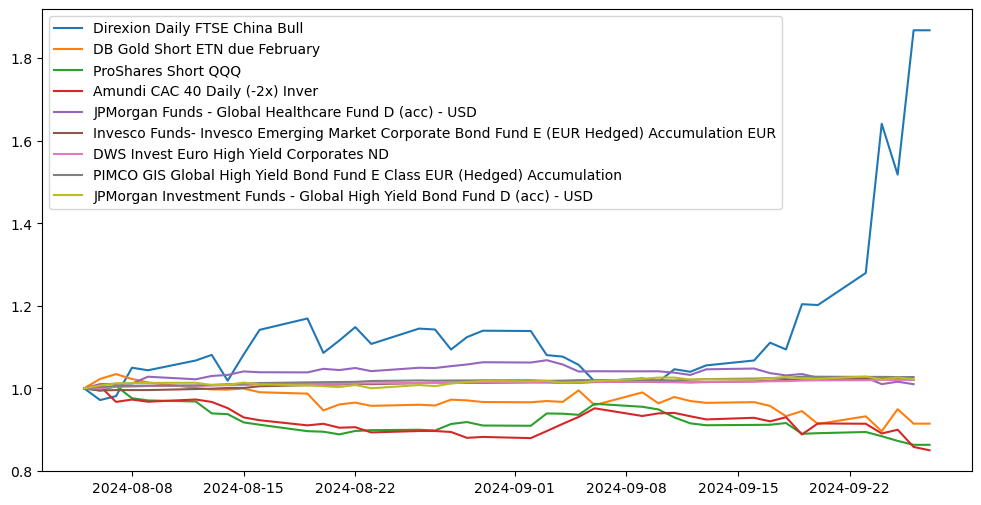

In [33]:
df_plot = df_quotes[pd.Index(funds_to_buy)][-40:] #.drop(columns=['LU0147408487'])
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_fund_list['Name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()

In [34]:
#mu = mean_historical_return(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
#S = CovarianceShrinkage(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
mu, S = my_ef(df_portofolio=new_p,current_date=current_date)
ef = EfficientFrontier(mu, S, weight_bounds=(0,max_weight), solver='SCS')
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df.sort_values('change_amount')

Expected annual return: 649906422.4%
Annual volatility: 4.8%
Sharpe Ratio: 136073296.24


,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
4,LU2308174304,0.076388,Morgan Stanley Global Opport,24510.540060,0.00000,c,0.000000,-24510.540060
5,IE00BNQ4LN68,0.062814,GAM Star MBS Total Return USD,20154.892461,0.00014,c,44.921402,-20109.971059
0,IE00B6VXJV34,0.109056,BNY Mellon Absolute Return Bond,34992.487000,0.05423,c,17400.625933,-17591.861067
8,IE00B59GC072,0.046858,GAM Star Global Accum Hedged,15035.307000,0.00000,c,0.000000,-15035.307000
10,XMLD.DE,0.042826,L&G Artificial Intelligence,13741.500378,0.00000,c,0.000000,-13741.500378
9,LU1883841022,0.046185,Amundi Pioneer Strategic Income,14819.113830,0.00379,c,1216.086526,-13603.027304
11,XBI,0.041646,SPDR S&P Biotech,13362.883768,0.00000,c,0.000000,-13362.883768
12,LU1146622755,0.037921,Aberdeen China A Sustainable,12167.580969,0.00014,c,44.921402,-12122.659567
2,LU0252500524,0.093746,JPM EUR Money VNAV,30079.918080,0.05903,c,18940.788288,-11139.129792
14,LU0048621477,0.034304,Fidelity Thailand A-DIST-USD,11006.919259,0.00000,c,0.000000,-11006.919259


### Get the revised Strategy, create wight bounds and initialize portofolio amounts

In [35]:
weight_strategy = pd.read_csv('portfolio_changes_strategy.csv',index_col=0)

c_flex = False

transaction_limit = 5000.0
min_amount = 4000.0
weight_bounds = list()
buy_list = list()
#df2 = df.set_index('Code')
for i, code in enumerate(df_quotes[new_p].columns):
    #print(i,code,weight_strategy.loc[code]['strategy'])
    if weight_strategy.loc[code]['strategy'] == 'c':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        if c_flex:
            weight_bounds.append((0,max_weight))
        else:
            if abs(weight_strategy.loc[code]['change_amount']) < transaction_limit:
                weight_bounds.append((kw,kw)) # Keep
            #elif abs(weight_strategy.loc[code]['final_amount']) < min_amount:
            #    weight_bounds.append((0.0,0.0)) # Sell everything
            elif weight_strategy.loc[code]['change_amount'] >= 0.0:
                weight_bounds.append((kw,max_weight)) # keep or buy
            else:
                weight_bounds.append((0.0,kw)) #keep or sell
    elif weight_strategy.loc[code]['strategy'] == 'k':
        weight_strategy.loc['change_amount',code] = 0.0
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        weight_bounds.append((kw,kw))
    elif weight_strategy.loc[code].loc['strategy'] == 'f':
        weight_strategy.loc['change_amount',code] = weight_strategy.loc[code]['final_amount'] - weight_strategy.loc[code]['amount']
        kw = weight_strategy.loc[code]['final_amount'] / final_portfolio_amount # weight for a fixed amount
        weight_bounds.append((kw,kw))
    else:
        print("Unknown weight_strategy:",weight_strategy.loc[code])
    if weight_strategy.loc[code]['change_amount'] >= 0.0:
        buy_list.append((i,weight_strategy.loc[code]['w_i']))

#buy_list

### Optimize the Target Return for the revised Strategy

In [36]:
#target_return = 0.8
#mu = mean_historical_return(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
#S = CovarianceShrinkage(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
mu, S = my_ef(df_portofolio=new_p,current_date=current_date)
ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
# Limit the amount to buy
if not c_flex:
    buy_final_w = (sum([w_i for _,w_i in buy_list])*current_portfolio_amount + amount_to_buy) / final_portfolio_amount
    ef.add_constraint(lambda x : sum([x[i] for i,_ in buy_list]) == buy_final_w)
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef,prev_strategy=weight_strategy)

df.sort_values('change_amount').to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df.sort_values('change_amount')


Expected annual return: 597808801.2%
Annual volatility: 5.2%
Sharpe Ratio: 115257867.67


,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
4,LU2308174304,0.076388,Morgan Stanley Global Opport,24510.540060,0.01934,c,6205.570820,-18304.969240
10,XMLD.DE,0.042826,L&G Artificial Intelligence,13741.500378,-0.00013,c,-41.712730,-13783.213108
12,LU1146622755,0.037921,Aberdeen China A Sustainable,12167.580969,0.00000,c,0.000000,-12167.580969
15,QTUM,0.033238,Defiance Quantum,10665.137484,-0.00015,c,-48.130074,-10713.267558
11,XBI,0.041646,SPDR S&P Biotech,13362.883768,0.01101,c,3532.747400,-9830.136368
7,IE00BLP5S460,0.052174,JupiterMerian Absolute Return,16740.825220,0.05188,c,16646.588114,-94.237106
24,LU0616840426,0.000000,0,0.000000,-0.00028,c,-89.842804,-89.842804
25,IE00B11XZ327,0.000000,0,0.000000,-0.00028,c,-89.842804,-89.842804
16,LU0705071453,0.032190,RAM System Long/Short Europ B,10328.843800,0.03192,c,10242.079657,-86.764143
23,LU0432979960,0.000000,0,0.000000,-0.00024,c,-77.008118,-77.008118


[]

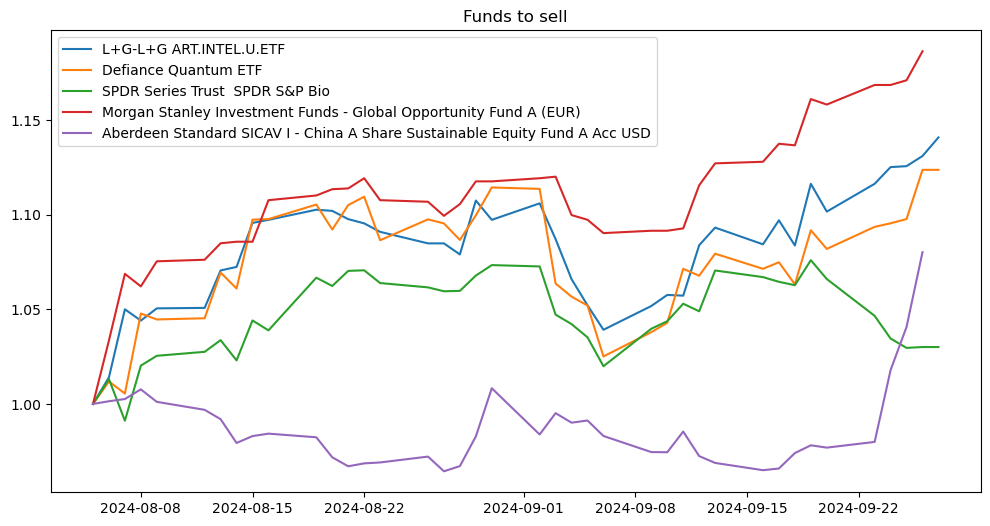

In [37]:
df_plot = df_quotes[df[df['change_amount']<=-transaction_limit]['Code']][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_fund_list['Name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.set_title('Funds to sell')  # Added title to the chart
ax.plot()

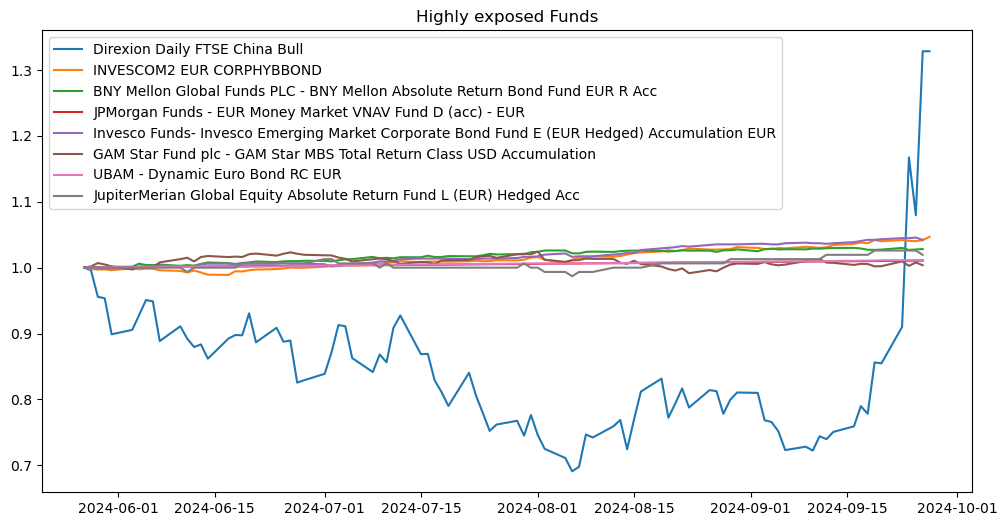

In [38]:
df_plot = df_quotes[df[df['w_o']>0.05 ]['Code']][-90:]
if df_plot.shape[1]:
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_fund_list['Name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.set_title('Highly exposed Funds')  # Added title to the chart
    ax.plot()

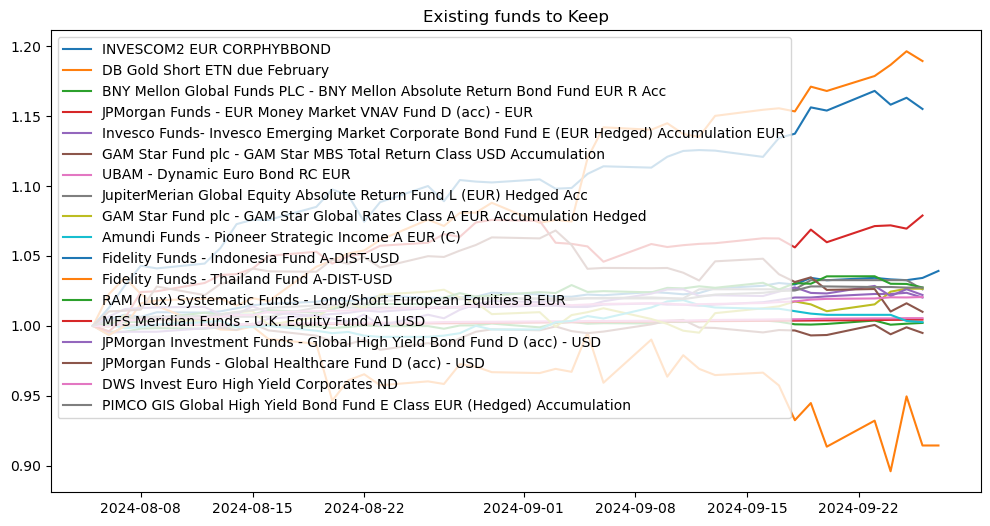

In [39]:
df_plot = df_quotes[df[(df['change_amount'].abs()<1000)]['Code']][-40:]
if df_plot.shape[1]:
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_fund_list['Name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.set_title('Existing funds to Keep')  # Added title to the chart
    ax.plot()

In [40]:
df_plot = df_quotes[df[(df['change_amount']>=transaction_limit)  & (df['amount']>0) ]['Code']][-40:]
if df_plot.shape[1]:
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_fund_list['Name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.set_title('Existing funds to Buy')  # Added title to the chart
    ax.plot()

<Axes: >

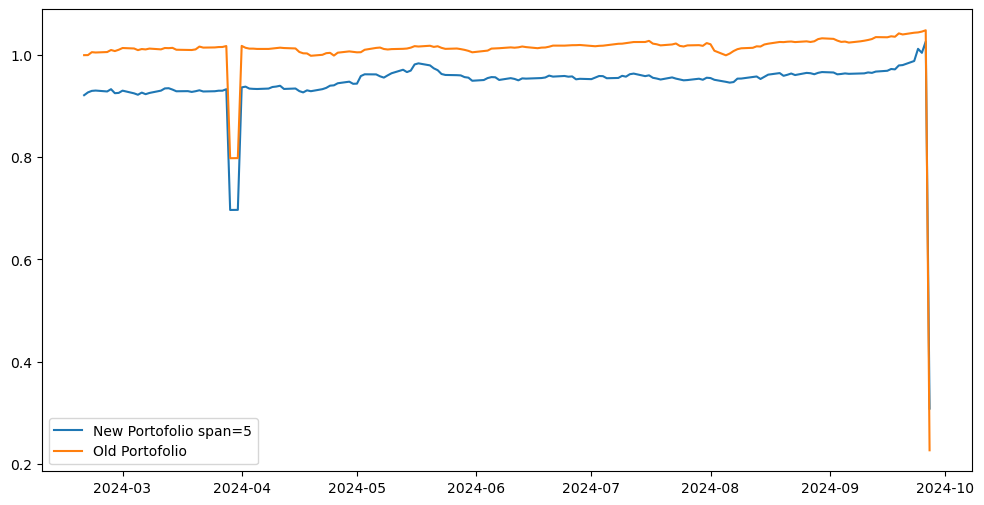

In [41]:
# Historical performance of the old and of the portfolio
df2 = df_quotes[df['Code']][-160:]
df2 = (df2 / df2.iloc[0])
if first_run:
    df_plot_f = pd.DataFrame(
        data={
            f'New Portofolio span={span}': (df2* df.set_index('Code')['w_o']).sum(axis=1), 
            'Old Portofolio': (df2* df.set_index('Code')['w_i']).sum(axis=1)
            }
        )
    first_run = False
else:
    df_plot_f[f'New Portofolio span={span}'] = (df2* df.set_index('Code')['w_o']).sum(axis=1)
df_plot_f.plot(figsize=(12,6))

<Axes: >

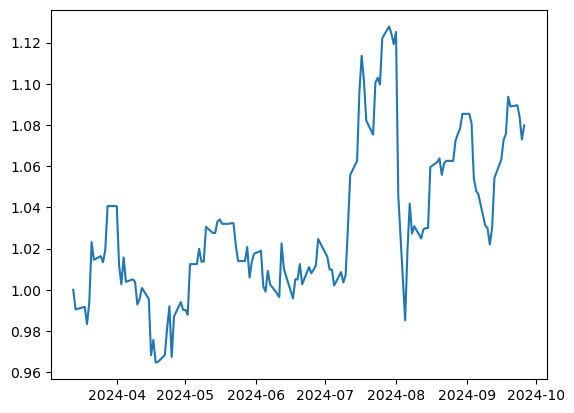

In [42]:
df_plot = df_quotes['LU0234682986'][-144:] #.drop(columns=['LU0147408487'])
df_plot.apply(lambda x: x/df_plot.iloc[0]).plot()

In [43]:
#df_plot_f.iloc[-1]/df_plot_f.iloc[-6]
'''
New Portofolio span=4     0.997857
Old Portofolio            1.001171
New Portofolio span=7     0.996592
New Portofolio span=14    0.996176
New Portofolio span=28    0.996794
New Portofolio span=3     0.997767
'''

'\nNew Portofolio span=4     0.997857\nOld Portofolio            1.001171\nNew Portofolio span=7     0.996592\nNew Portofolio span=14    0.996176\nNew Portofolio span=28    0.996794\nNew Portofolio span=3     0.997767\n'

### Best Portofolio from all the funds

In [44]:
'''### Inputs
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()
df_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)

mu = mean_historical_return(df_selected_quotes[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_selected_quotes[-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)

mu = mean_historical_return(df_top[-13:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_top[-13:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df['name'] = df['symbol'].map(df_perform['name'])
best_from_all = df['symbol']
print(df)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
'''

"### Inputs\n# Funds to use\nselected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()\ndf_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)\n\nmu = mean_historical_return(df_selected_quotes[-last_n:])\n# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)\n# mu_ds = df_perform['2 week']\n# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()\nS = CovarianceShrinkage(df_selected_quotes[-cov_n:]).ledoit_wolf()\nef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))\nef.max_sharpe(risk_free_rate=risk_free_rate)\n#ef.efficient_return(target_return=0.25)\ncleaned_weights = ef.clean_weights()\ncleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]\ndf = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)\n\ndf_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)\n\nmu = mean_historical_return(df_top[-13:])\n# mu_ds = ((df_perform[

### Study Best Return

In [45]:
'''
#min_return, max_return = 0.13, 0.30

result = list()
for tr in np.linspace(min_return, max_return, 13)[1:-2]:
    _, performance = new_funds_to_add(
        df_portofolio=new_portfolio,
        selected_funds=selected_funds, 
        n_funds_to_add=n_funds_to_add,
        last_n=last_n,
        goal='efficient_return',
        target=tr,
        verbose=False,
        weight_bounds=(0,max_weight))
    if performance is not None:
        result.append(performance)
        print(f"Return={performance[0]}; Volatility={performance[1]}; Sharpe={performance[2]}")
df_result = pd.DataFrame(result,columns=['return','volatility','sharpe']).set_index('volatility')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the left y-axis
color = 'tab:green'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Return', color=color)
ax1.plot(df_result.index, df_result['return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
color = 'tab:blue'
ax2.set_ylabel('sharpe', color=color)
ax2.plot(df_result.index, df_result['sharpe'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.show()'''

'\n#min_return, max_return = 0.13, 0.30\n\nresult = list()\nfor tr in np.linspace(min_return, max_return, 13)[1:-2]:\n    _, performance = new_funds_to_add(\n        df_portofolio=new_portfolio,\n        selected_funds=selected_funds, \n        n_funds_to_add=n_funds_to_add,\n        last_n=last_n,\n        goal=\'efficient_return\',\n        target=tr,\n        verbose=False,\n        weight_bounds=(0,max_weight))\n    if performance is not None:\n        result.append(performance)\n        print(f"Return={performance[0]}; Volatility={performance[1]}; Sharpe={performance[2]}")\ndf_result = pd.DataFrame(result,columns=[\'return\',\'volatility\',\'sharpe\']).set_index(\'volatility\')\n\n# Create a figure and axis\nfig, ax1 = plt.subplots()\n\n# Plot the first variable on the left y-axis\ncolor = \'tab:green\'\nax1.set_xlabel(\'X-axis\')\nax1.set_ylabel(\'Return\', color=color)\nax1.plot(df_result.index, df_result[\'return\'], color=color)\nax1.tick_params(axis=\'y\', labelcolor=color)\n